## Company Information:
The data set is based upon <a src="https://www.kaggle.com/prateikmahendra/loan-data"> Lending Club Information </a>. 
- The Irish Dummy Banks  is a  peer to peer lending bank based in the ireland, in which bank provide funds for potential borrowers and bank earn a profit depending on the risk they take (the borrowers credit score). Irish Fake bank provides loan to their loyal customers. The complete data set is borrowed from Lending Club For more basic information about the company please check out the wikipedia article about the company. This dataset is copied and clean from kaggle but it has been changed. The any kind of similarity is just for learning purposes. I dont have any intention for palgrisim I just like to be clear myself. <br><br>


<a src="https://en.wikipedia.org/wiki/Lending_Club"> Lending Club Information </a>



### Dataset Description

- LoanStatNew	Description

- addr_state	The state provided by the borrower in the loan application

- annual_inc	The self-reported annual income provided by the borrower during registration.

- annual_inc_joint	The combined self-reported annual income provided by the co-borrowers during registration

- application_type	Indicates whether the loan is an individual application or a joint application with two co-borrowers

- collection_recovery_fee	post charge off collection fee

- collections_12_mths_ex_med	Number of collections in 12 months excluding medical collections

- delinq_2yrs	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

- desc	Loan description provided by the borrower

- dti	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, - - - excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- dti_joint	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, - excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

- earliest_cr_line	The month the borrower's earliest reported credit line was opened

- emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year 

- and 10 means ten or more years. 

- emp_title	The job title supplied by the Borrower when applying for the loan.*

- fico_range_high	The upper boundary range the borrower’s FICO at loan origination belongs to.

- fico_range_low	The lower boundary range the borrower’s FICO at loan origination belongs to.

- funded_amnt	The total amount committed to that loan at that point in time.

- funded_amnt_inv	The total amount committed by investors for that loan at that point in time.

- grade	LC assigned loan grade

- home_ownership	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


In [1]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')


% matplotlib inline

df = pd.read_csv("C:/Users/mrferozi/Documents/Panada_ml/loan/lending-club-loan-data/loan_final313.csv",low_memory=False, index_col=0)

# Copy of the dataframe
original_df = df.copy()

import warnings; warnings.simplefilter('ignore')

C:\Users\mrferozi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc              float64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [3]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc              float64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [4]:
df.annual_inc.isnull().sum()

4

In [5]:
df.annual_inc.mean()

75027.5878630793

In [6]:
# fill in missing values with a specified value
df['annual_inc'].fillna(value='75027', inplace=True)

In [7]:
df['annual_inc']=df.annual_inc.astype(int)

## Similar Distributions:
<a id="similar_distributions"></a>
We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly. <br>

<h4> What we need to know: </h4> <br>
<ul>
<li> Understand what amount was <b>mostly issued</b> to borrowers. </li>
<li> Which <b>year</b> issued the most loans. </li>
<li> The distribution of loan amounts is a <b>multinomial distribution </b>.</li>
</ul>


In [8]:
# multiple aggregation functions can be applied simultaneously
stat1=df.groupby('year').loan_amount.agg(['count', 'mean', 'min', 'max'])

In [9]:
df1 = pd.DataFrame(stat1)

In [10]:
df1

,count,mean,min,max
year,,,,
2007,603,8254.519071,500,25000
2008,2393,8825.428333,500,25000
2009,5281,9833.033516,1000,25000
2010,12537,10528.240408,1000,25000
2011,21721,12047.503568,1000,35000
2012,53367,13461.709015,1000,35000
2013,134755,14708.094134,1000,35000
2014,235628,14870.177462,1000,35000
2015,421094,15240.255561,1000,35000


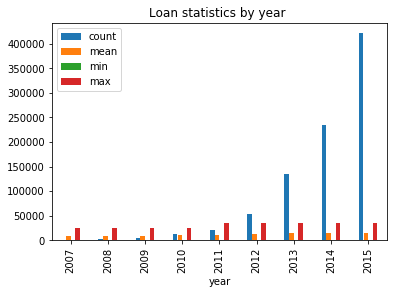

In [11]:
df1.plot(kind='bar', title='Loan statistics by year ')

In [12]:
# multiple aggregation functions can be applied simultaneously
stat2=df.groupby('region').loan_amount.agg(['count', 'mean', 'min', 'max'])

In [13]:
df2 = pd.DataFrame(stat2)

In [14]:
df2

,count,mean,min,max
region,,,,
Northern-Irl,204399,14926.927358,500,35000
cannught,155029,14550.319456,500,35000
leinster,214646,14622.685142,500,35000
munster,104574,15232.329977,500,35000
ulster,208731,14636.708970,500,35000


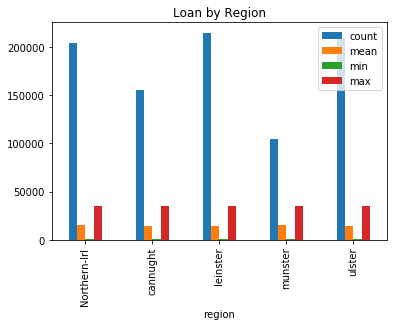

In [15]:
df2.plot(kind='bar', title='Loan by Region')

In [16]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int32
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [17]:
df.loan_condition.head(10)

id
1077501    Good Loan
1077430     Bad Loan
1077175    Good Loan
1076863    Good Loan
1075358    Good Loan
1075269    Good Loan
1069639    Good Loan
1072053    Good Loan
1071795     Bad Loan
1071570     Bad Loan
Name: loan_condition, dtype: object

In [18]:
badloans_df = df.loc[df["loan_condition_cat"] == 1]

In [19]:
goodloans_df = df.loc[df["loan_condition_cat"] == 0]

In [20]:
# loan_status cross
loan_status_cross_region = pd.crosstab(badloans_df['region'], badloans_df['loan_condition_cat']).apply(lambda x: x/x.sum() * 100)
loan_status_cross_region

loan_condition_cat,1
region,
Northern-Irl,23.925907
cannught,15.984220
leinster,24.735648
munster,10.984888
ulster,24.369337


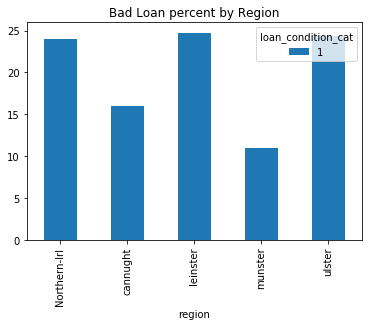

In [21]:
loan_status_cross_region.plot(kind='bar', title='Bad Loan percent by Region')

In [22]:
# loan_status cross
loan_status_cross_year = pd.crosstab(badloans_df['year'], badloans_df['loan_condition_cat']).apply(lambda x: x/x.sum() * 100)
loan_status_cross_year

loan_condition_cat,1
year,
2007,0.234321
2008,0.735589
2009,1.072239
2010,2.611636
2011,4.891071
2012,12.522802
2013,26.835635
2014,33.156357
2015,17.940352


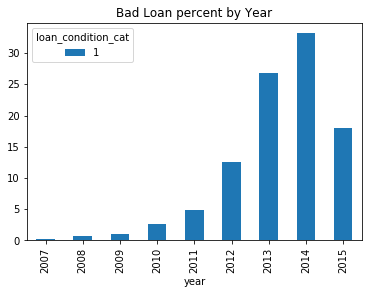

In [23]:
loan_status_cross_year.plot(kind='bar', title='Bad Loan percent by Year')

In this section, we will see what is the amount of bad loans Irish Fake Bank has declared so far, of course we have to understand that there are still loans that are at a risk of defaulting in the future. 

<h4> What we need to know: </h4>
<ul>
<li> The amount of bad loans could <b>increment</b> as the days pass by, since we still have a great amount of current loans. </li>
<li> <b>Average annual income</b> is an important key metric for finding possible opportunities of investments in a specific region. </li>

</ul>

In [24]:
loan_status=df[df.loan_condition_cat== 1].emp_length_int.value_counts()

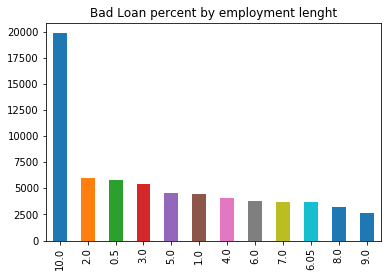

In [25]:
loan_status.plot(kind='bar', title='Bad Loan percent by employment lenght')

In [26]:
loan_status=df[df.loan_condition_cat== 1].home_ownership_cat.value_counts()

In [27]:
a = df.home_ownership_cat.unique()

In [28]:
b = df.home_ownership.unique()

In [29]:
c = pd.DataFrame(a,b)
c

,0
RENT,1
OWN,2
MORTGAGE,3
OTHER,4
NONE,5
ANY,6


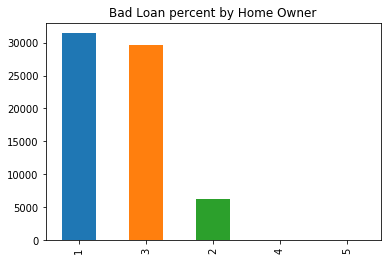

In [30]:
loan_status.plot(kind='bar', title='Bad Loan percent by Home Owner')

In [31]:
a = df.income_category.unique()
b = df.income_cat.unique()

In [32]:
c = pd.DataFrame(a,b)
c

,0
1,Low
2,Medium
3,High


In [33]:
loan_status=df[df.loan_condition_cat== 1].income_cat.value_counts()

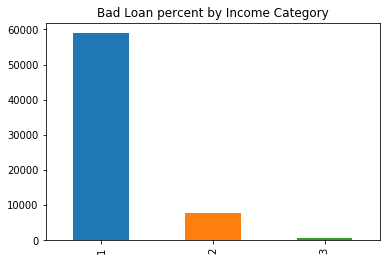

In [34]:
loan_status.plot(kind='bar', title='Bad Loan percent by Income Category')

In [35]:
a = df.application_type.unique()
b = df.application_type_cat.unique()

In [36]:
c = pd.DataFrame(a,b)
c

,0
1,INDIVIDUAL
2,JOINT


In [37]:
loan_status=df[df.loan_condition_cat== 1].application_type_cat.value_counts()

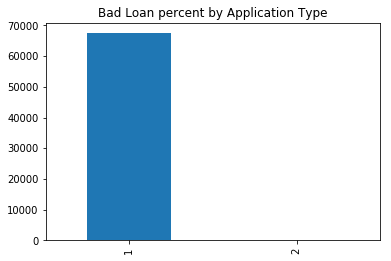

In [38]:
loan_status.plot(kind='bar', title='Bad Loan percent by Application Type')

In [39]:
a = df.purpose.unique()
b = df.purpose_cat.unique()
c = pd.DataFrame(a,b)
c

,0
1,credit_card
2,car
3,small_business
4,other
5,wedding
6,debt_consolidation
7,home_improvement
8,major_purchase
9,medical
10,moving


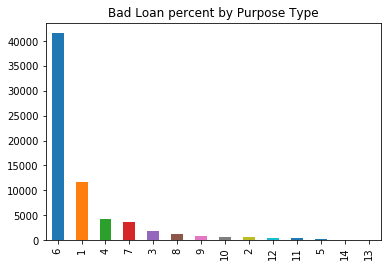

In [40]:
loan_status=df[df.loan_condition_cat== 1].purpose_cat.value_counts()
loan_status.plot(kind='bar', title='Bad Loan percent by Purpose Type')

In [41]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int32
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [42]:
df.interest_payments.head(10)

id
1077501     Low
1077430    High
1077175    High
1076863    High
1075358     Low
1075269     Low
1069639    High
1072053    High
1071795    High
1071570     Low
Name: interest_payments, dtype: object

In [43]:
a = df.interest_payments.unique()
b = df.interest_payment_cat.unique()
c = pd.DataFrame(a,b)
c

,0
1,Low
2,High


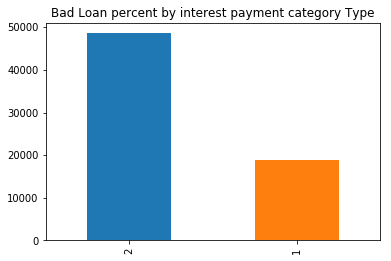

In [44]:
loan_status=df[df.loan_condition_cat== 1].interest_payment_cat.value_counts()
loan_status.plot(kind='bar', title='Bad Loan percent by interest payment category Type')

In [45]:
a = df.grade.unique()
b = df.grade_cat.unique()
c = pd.DataFrame(a,b)
c

,0
2,B
3,C
1,A
5,E
6,F
4,D
7,G


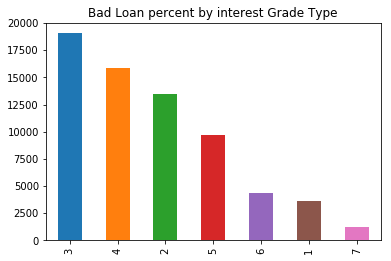

In [46]:
loan_status=df[df.loan_condition_cat== 1].grade_cat.value_counts()
loan_status.plot(kind='bar', title='Bad Loan percent by interest Grade Type')

Now we will have a closer look at the <b> operative side </b> of business by state. This will give us a clearer idea in which state we have a higher operating activity. This will allow us to ask further questions such as Why do we have a higher level of operating activity in this state? Could it be because of economic factors? or the risk level is low and returns are fairly decent? Let's explore!

<h4> What we need to know: </h4>
<ul>
<li> We will focus on <b>three key metrics</b>: Loans issued by state (Total Sum), Average interest rates charged to customers and average annual income of all customers by state. </li>
<li> The purpose of this analysis is to see states that give high returns at a descent risk. </li>


### Loans issued by state (Total Sum)

In [47]:
# loan_status cross
loan_status_cross_region = pd.crosstab(badloans_df['region'], badloans_df['loan_condition_cat']).apply(lambda x: x/x.sum() * 100)
loan_status_cross_region

loan_condition_cat,1
region,
Northern-Irl,23.925907
cannught,15.984220
leinster,24.735648
munster,10.984888
ulster,24.369337


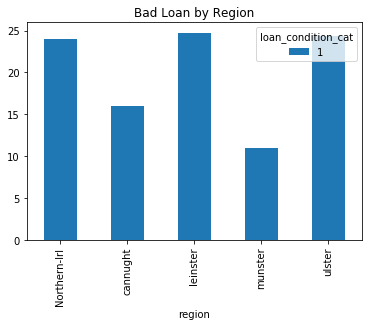

In [48]:
loan_status_cross_region.plot(kind='bar', title='Bad Loan by Region')

### Average interest rates charged to customers

In [49]:
#df.interest_rate
# calculate the mean beer servings for each continent
stat4 = df.groupby('region').interest_rate.mean()
stat4

region
Northern-Irl    13.200422
cannught        13.226123
leinster        13.359220
munster         13.187215
ulster          13.221563
Name: interest_rate, dtype: float64

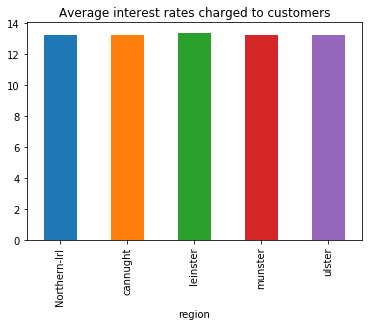

In [50]:
stat4.plot(kind='bar', x='region', y='interest rate', title='Average interest rates charged to customers')

In [51]:
stat4 = df.groupby('year').interest_rate.mean()
stat4


year
2007    11.825108
2008    12.061964
2009    12.437247
2010    11.985268
2011    12.223746
2012    13.637676
2013    14.531745
2014    13.771245
2015    12.601731
Name: interest_rate, dtype: float64

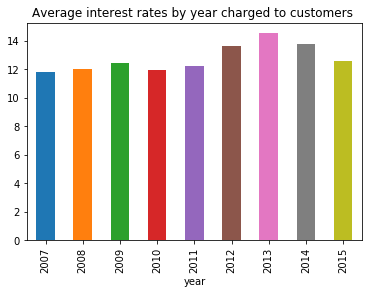

In [52]:
stat4.plot(kind='bar', x='year', y='interest rate', title='Average interest rates by year charged to customers ')

### What is DTI?
A debt income ratio (often abbreviated DTI) is the percentage of a consumer's monthly gross income that goes toward paying debts. (Speaking precisely, DTIs often cover more than just debts; they can include principal, taxes, fees, and insurance premiums as well.

In [53]:
stat4 = df.groupby('year').dti.mean()
stat4

year
2007    10.709519
2008    13.204605
2009    12.466548
2010    13.095154
2011    13.846331
2012    16.661354
2013    17.216032
2014    18.040782
2015    19.196014
Name: dti, dtype: float64

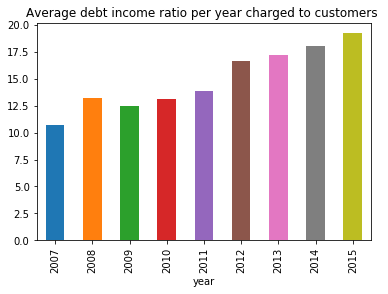

In [54]:
stat4.plot(kind='bar', x='year', y='debt income ratio ', title='Average debt income ratio per year charged to customers ')

In [55]:
stat4 = df.groupby('region').dti.mean()
stat4

region
Northern-Irl    17.238847
cannught        18.832687
leinster        18.868462
munster         19.185034
ulster          17.307747
Name: dti, dtype: float64

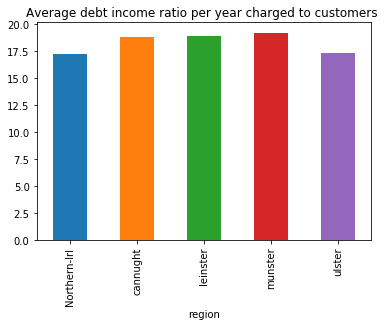

In [56]:
stat4.plot(kind='bar', x='Region', y='debt income ratio ', title='Average debt income ratio per year charged to customers ')


- The Number of Bad Loans =  67429

- The Number of Good Loans = 819950

-------------------------------------
- Total Number of Loan = 887,379

- The percentage of bad loand in 887,379 is 7.60 % aproximately

In [57]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int32
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [58]:
df.income_cat.unique()

array([1, 2, 3], dtype=int64)

[Text(0,0.5,'(%)')]

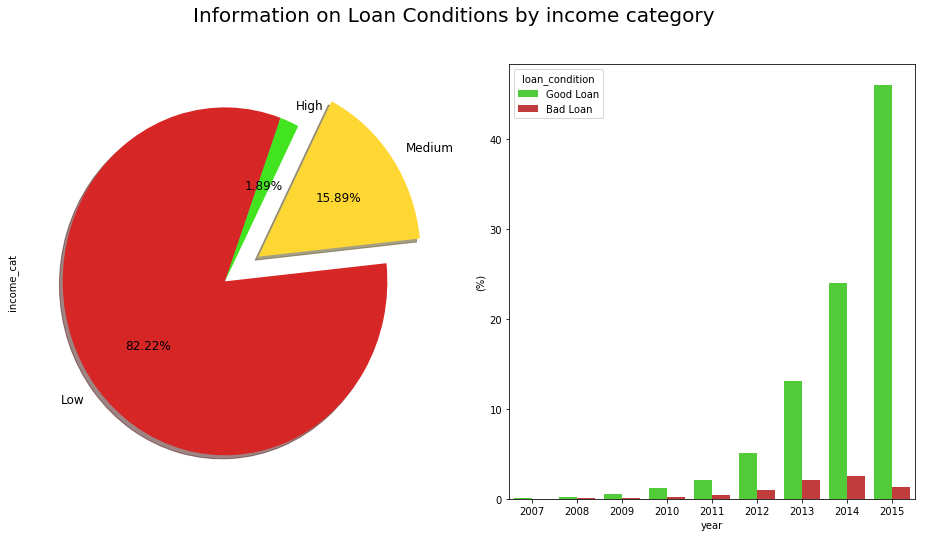

In [59]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#D72626", "#ffd733", "#42e31f"]
labels ="Low", "Medium", "High"

plt.suptitle('Information on Loan Conditions by income category', fontsize=20)

df["income_cat"].value_counts().plot.pie(explode=[0,0.25,0], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

palette = ["#42e31f", "#D72626", "#ffd733"]

sns.barplot(x="year", y="income_cat", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [ ]:
df.to_csv('C:\\Users\\mrferozi\\Documents\\Panada_ml\\loan\\lending-club-loan-data\\loan_final313.csv')